In [4]:
import pandas as pd
import numpy as np

# Load the datasets
sales_data = pd.read_csv('/content/Pizza_Sale - pizza_sales.csv')
ingredients_data = pd.read_csv('/content/Pizza_ingredients - Pizza_ingredients.csv')

# Check for missing values
print(sales_data.isnull().sum())
print(ingredients_data.isnull().sum())

# Handle missing values
sales_data.fillna(0, inplace=True)  # Example: fill missing values with 0
ingredients_data.fillna(0, inplace=True)

# Remove duplicates
sales_data.drop_duplicates(inplace=True)
ingredients_data.drop_duplicates(inplace=True)


pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64
pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64


In [5]:
invalid_dates = sales_data[~sales_data['order_date'].str.match(r"\d{2}-\d{2}-\d{4}")]
print(invalid_dates)



       pizza_id  order_id  pizza_name_id  quantity  order_date order_time  \
0             1         1     hawaiian_m         1    1/1/2015   11:38:36   
1             2         2  classic_dlx_m         1    1/1/2015   11:57:40   
2             3         2  five_cheese_l         1    1/1/2015   11:57:40   
3             4         2    ital_supr_l         1    1/1/2015   11:57:40   
4             5         2     mexicana_m         1    1/1/2015   11:57:40   
...         ...       ...            ...       ...         ...        ...   
46436     46437     20398     thai_ckn_m         1  12/12/2015   21:32:44   
46437     46438     20399      bbq_ckn_s         1  12/12/2015   22:47:24   
46438     46439     20399  ital_cpcllo_l         1  12/12/2015   22:47:24   
46439     46440     20399   spicy_ital_s         1  12/12/2015   22:47:24   
46440     46441     20399   spin_pesto_l         1  12/12/2015   22:47:24   

       unit_price  total_price pizza_size pizza_category  \
0           13.

In [6]:
pd.to_datetime

<function pandas.core.tools.datetimes.to_datetime(arg: 'DatetimeScalarOrArrayConvertible | DictConvertible', errors: 'DateTimeErrorChoices' = 'raise', dayfirst: 'bool' = False, yearfirst: 'bool' = False, utc: 'bool' = False, format: 'str | None' = None, exact: 'bool | lib.NoDefault' = <no_default>, unit: 'str | None' = None, infer_datetime_format: 'lib.NoDefault | bool' = <no_default>, origin: 'str' = 'unix', cache: 'bool' = True) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'>

In [7]:
print(invalid_dates)


       pizza_id  order_id  pizza_name_id  quantity  order_date order_time  \
0             1         1     hawaiian_m         1    1/1/2015   11:38:36   
1             2         2  classic_dlx_m         1    1/1/2015   11:57:40   
2             3         2  five_cheese_l         1    1/1/2015   11:57:40   
3             4         2    ital_supr_l         1    1/1/2015   11:57:40   
4             5         2     mexicana_m         1    1/1/2015   11:57:40   
...         ...       ...            ...       ...         ...        ...   
46436     46437     20398     thai_ckn_m         1  12/12/2015   21:32:44   
46437     46438     20399      bbq_ckn_s         1  12/12/2015   22:47:24   
46438     46439     20399  ital_cpcllo_l         1  12/12/2015   22:47:24   
46439     46440     20399   spicy_ital_s         1  12/12/2015   22:47:24   
46440     46441     20399   spin_pesto_l         1  12/12/2015   22:47:24   

       unit_price  total_price pizza_size pizza_category  \
0           13.

In [8]:
#  Replace slashes with dashes if that's causing issues
sales_data['order_date'] = sales_data['order_date'].str.replace('/', '-', regex=False)


In [9]:
sales_data = sales_data[sales_data['order_date'].str.match(r"\d{2}-\d{2}-\d{4}")]


In [10]:
#  Fill missing dates with a default value (e.g., today's date)
sales_data['order_date'].fillna(pd.Timestamp.today(), inplace=True)


<ipython-input-10-911b6612394a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['order_date'].fillna(pd.Timestamp.today(), inplace=True)


In [11]:
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'], dayfirst=True, errors='coerce')


In [12]:
# Save invalid dates to a file
invalid_dates.to_csv('invalid_dates.csv', index=False)


In [13]:
print(sales_data.info())
print(sales_data['order_date'].head())


<class 'pandas.core.frame.DataFrame'>
Index: 30076 entries, 1650 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           30076 non-null  int64         
 1   order_id           30076 non-null  int64         
 2   pizza_name_id      30076 non-null  object        
 3   quantity           30076 non-null  int64         
 4   order_date         30076 non-null  datetime64[ns]
 5   order_time         30076 non-null  object        
 6   unit_price         30076 non-null  float64       
 7   total_price        30076 non-null  float64       
 8   pizza_size         30076 non-null  object        
 9   pizza_category     30076 non-null  object        
 10  pizza_ingredients  30076 non-null  object        
 11  pizza_name         30076 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 3.0+ MB
None
1650   2015-01-13
1651   2015-01-13
1

In [14]:
# Check for missing values
print(sales_data.isnull().sum())
print(ingredients_data.isnull().sum())

# Handle missing values
sales_data.fillna(0, inplace=True)  # Example: fill missing values with 0
ingredients_data.fillna(0, inplace=True)

# Remove duplicates
sales_data.drop_duplicates(inplace=True)
ingredients_data.drop_duplicates(inplace=True)

# Format date columns
sales_data['0rder_date'] = pd.to_datetime(sales_data['order_date'])

# Check data types
print(sales_data.dtypes)
print(ingredients_data.dtypes)


pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64
pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    0
dtype: int64
pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
0rder_date           datetime64[ns]
dtype: object
pizza_name_id          object
pizza_name             object
pizza_ingredients      object
Items_Qty_In_Grams    float64


           pizza_id      order_id      quantity  \
count  30076.000000  30076.000000  30076.000000   
mean   25739.748171  11329.199960      1.019717   
min     1651.000000    737.000000      1.000000   
25%    14117.750000   6179.000000      1.000000   
50%    26684.500000  11753.000000      1.000000   
75%    38596.250000  17015.250000      1.000000   
max    48620.000000  21350.000000      4.000000   
std    14094.697736   6204.104945      0.143731   

                          order_date    unit_price  total_price  \
count                          30076  30076.000000  30076.00000   
mean   2015-07-10 04:44:58.443941888     16.490581     16.82039   
min              2015-01-13 00:00:00      9.750000      9.75000   
25%              2015-04-14 00:00:00     12.750000     12.75000   
50%              2015-07-15 00:00:00     16.500000     16.50000   
75%              2015-10-15 00:00:00     20.250000     20.50000   
max              2015-12-31 00:00:00     35.950000     83.00000   
std 

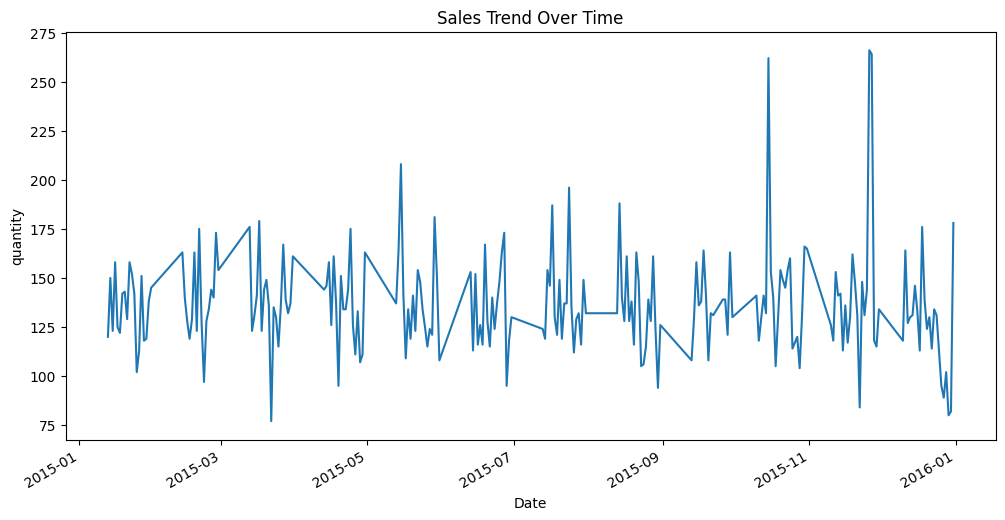

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic characteristics
print(sales_data.describe())
print(ingredients_data.describe())

# Visualize sales trends over time
plt.figure(figsize=(12, 6))
sales_data.groupby('order_date')['quantity'].sum().plot()
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('quantity')
plt.show()




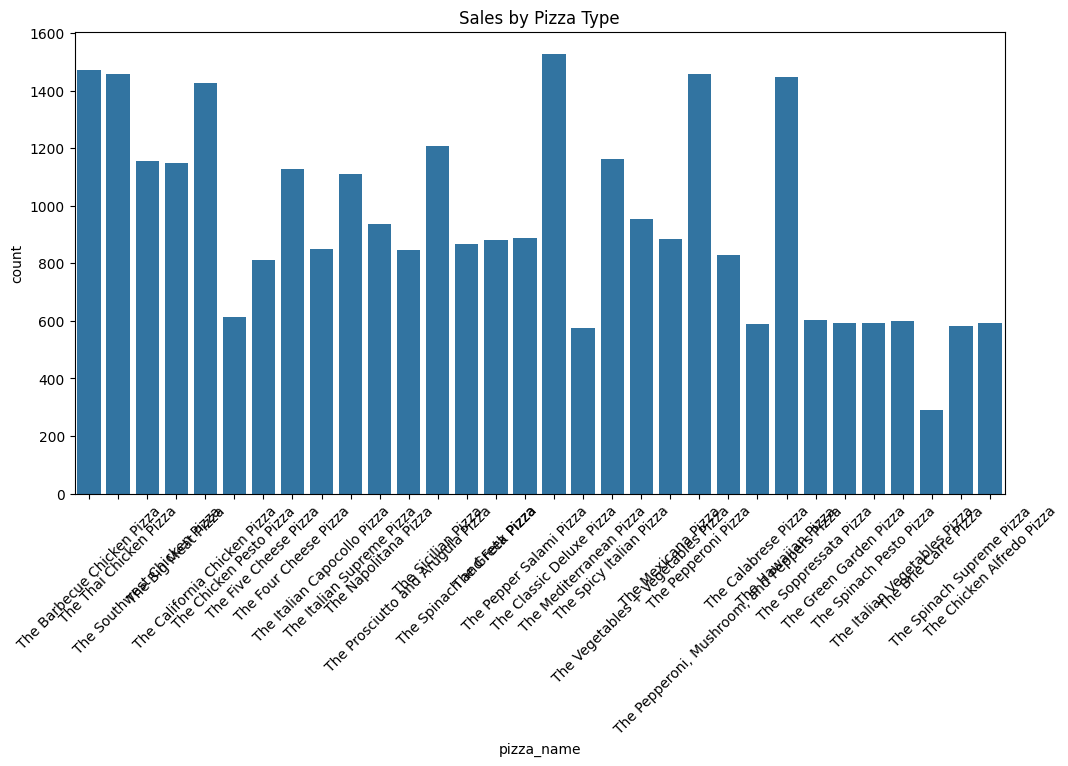

In [16]:
# Visualize sales by pizza type
plt.figure(figsize=(12, 6))
sns.countplot(data=sales_data, x='pizza_name')
plt.title('Sales by Pizza Type')
plt.xticks(rotation=45)
plt.show()


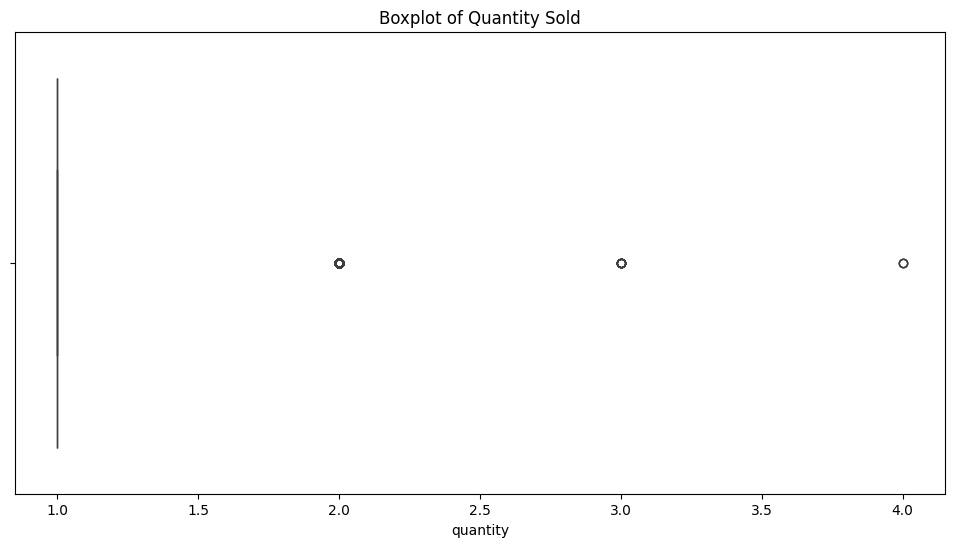

In [17]:
# Check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=sales_data, x='quantity')
plt.title('Boxplot of Quantity Sold')
plt.show()

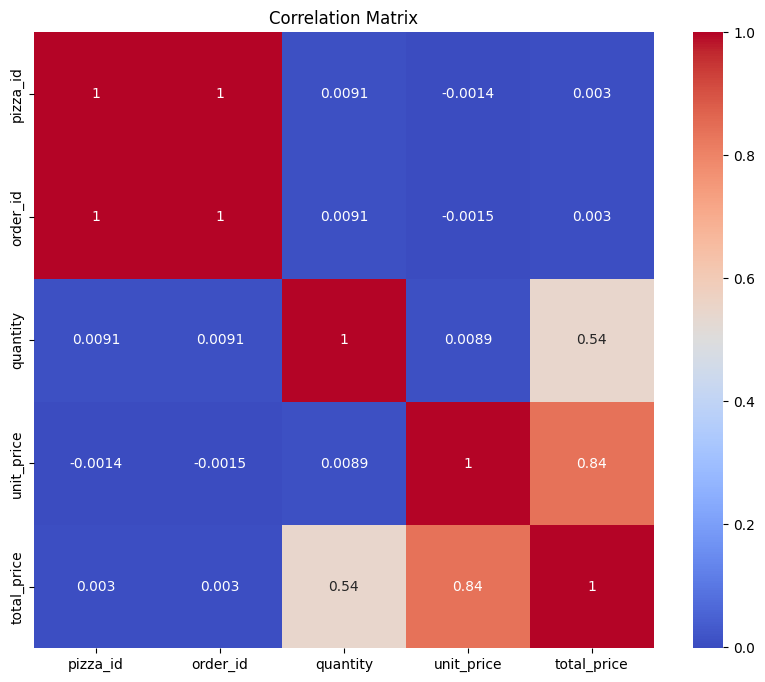

In [18]:
# Select numeric columns
numeric_columns = sales_data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [19]:
# Create additional features
sales_data['Day of Week'] = sales_data['order_date'].dt.dayofweek
sales_data['Month'] = sales_data['order_date'].dt.month
sales_data['Year'] = sales_data['order_date'].dt.year

In [20]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Prepare data for ARIMA
sales_data_grouped = sales_data.groupby('order_date')['quantity'].sum()
sales_data_grouped = sales_data_grouped.asfreq('D').fillna(0)  # Fill missing dates

# Split into train and test sets
train_size = int(len(sales_data_grouped) * 0.8)
train, test = sales_data_grouped[:train_size], sales_data_grouped[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Adjust order as needed
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

In [21]:
# Evaluate model performance
mape = mean_absolute_percentage_error(test, forecast)
print(f'MAPE: {mape:.2f}')

MAPE: 173841451992500224.00


Future Sales Forecast: 2015-10-22    138.119496
2015-10-23    138.181153
2015-10-24    141.741023
2015-10-25    135.168575
2015-10-26    136.379351
2015-10-27    137.178245
2015-10-28    137.077012
Freq: D, Name: predicted_mean, dtype: float64


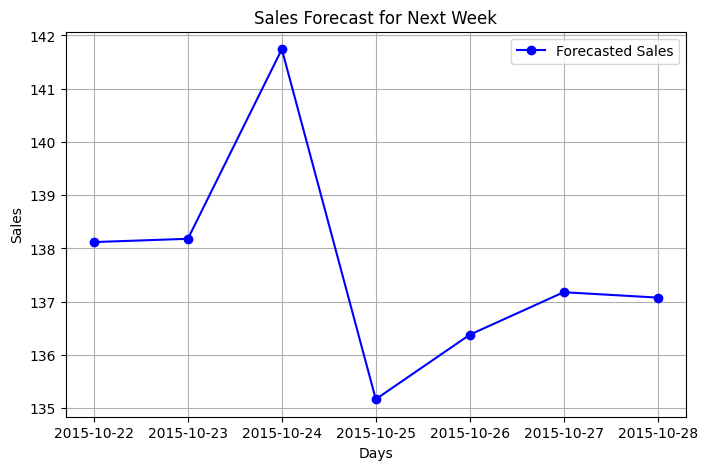

In [22]:
# Predict sales for the next week
# Generate future forecast
future_forecast = model_fit.forecast(steps=7)

# Print future forecast
print(f'Future Sales Forecast: {future_forecast}')

# Plot the sales forecast for the next week
plt.figure(figsize=(8, 5))
plt.plot(future_forecast, marker='o', linestyle='-', color='blue', label='Forecasted Sales')
plt.title('Sales Forecast for Next Week')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


In [23]:
# Ensure correct column names are used
ingredient_requirements = ingredients_data.set_index('pizza_name')['Items_Qty_In_Grams']

# Assuming you have a mapping of pizza types to quantities sold
required_ingredients = {}
for pizza_type, quantity in zip(sales_data['pizza_name'], future_forecast):
    if pizza_type in ingredient_requirements.index:
        required_ingredients[pizza_type] = required_ingredients.get(pizza_type, 0) + (
            quantity * ingredient_requirements[pizza_type]
        )

# Convert to DataFrame for purchase order
purchase_order = pd.DataFrame(
    list(required_ingredients.items()), columns=['Pizza Type', 'Quantity Needed']
)
print(purchase_order)


                     Pizza Type  \
0    The Barbecue Chicken Pizza   
1        The Thai Chicken Pizza   
2   The Southwest Chicken Pizza   
3            The Big Meat Pizza   
4  The California Chicken Pizza   
5       The Chicken Pesto Pizza   
6         The Five Cheese Pizza   

                                     Quantity Needed  
0  pizza_name
The Barbecue Chicken Pizza    5524....  
1  pizza_name
The Thai Chicken Pizza    20727.172...  
2  pizza_name
The Southwest Chicken Pizza    2126...  
3  pizza_name
The Big Meat Pizza    20275.286232
...  
4  pizza_name
The California Chicken Pizza    204...  
5  pizza_name
The Chicken Pesto Pizza    20576.73...  
6  pizza_name
The Five Cheese Pizza    4112.31036...  


In [24]:
# Save the purchase order to a CSV file
purchase_order.to_csv('purchase_order.csv')

In [25]:
# Forecast sales for the next week (7 days)
future_forecast = model_fit.forecast(steps=7)
future_dates = pd.date_range(start=sales_data_grouped.index[-1] + pd.Timedelta(days=1), periods=7)

# Create a DataFrame for the forecasted sales
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted Sales': future_forecast})
print(forecast_df)

                 Date  Forecasted Sales
2015-10-22 2016-01-01        138.119496
2015-10-23 2016-01-02        138.181153
2015-10-24 2016-01-03        141.741023
2015-10-25 2016-01-04        135.168575
2015-10-26 2016-01-05        136.379351
2015-10-27 2016-01-06        137.178245
2015-10-28 2016-01-07        137.077012


In [26]:
# Create a DataFrame to hold the total ingredient requirements
total_ingredient_requirements = pd.DataFrame(columns=['Ingredient', 'Quantity Needed'])

# Loop through the forecasted sales and calculate ingredient requirements
for index, row in forecast_df.iterrows():
    forecasted_sales = row['Forecasted Sales']
    date = row['Date']

    # Get the pizza types sold on this date (you can customize this logic)
    pizza_types = sales_data[sales_data['order_date'] == date]['pizza_name'].unique()

    for pizza_type in pizza_types:
        # Get the ingredient requirements for this pizza type
        ingredient_requirements = ingredients_data[ingredients_data['Pizza Type'] == pizza_type]

        for _, ingredient_row in ingredient_requirements.iterrows():
            ingredient = ingredient_row['Ingredient']
            quantity_needed = ingredient_row['Quantity Needed'] * forecasted_sales

            # Update the total ingredient requirements
            if ingredient in total_ingredient_requirements['Ingredient'].values:
                total_ingredient_requirements.loc[total_ingredient_requirements['Ingredient'] == ingredient, 'Quantity Needed'] += quantity_needed
            else:
                total_ingredient_requirements = total_ingredient_requirements.append({'Ingredient': ingredient, 'Quantity Needed': quantity_needed}, ignore_index=True)

# Display the total ingredient requirements
print(total_ingredient_requirements)

Empty DataFrame
Columns: [Ingredient, Quantity Needed]
Index: []


In [27]:
# Create a purchase order DataFrame
purchase_order = total_ingredient_requirements.copy()
purchase_order['Quantity Needed'] = purchase_order['Quantity Needed'].round(2)  # Round to 2 decimal places for clarity

# Save the purchase order to a CSV file
purchase_order.to_csv('purchase_order.csv', index=False)

print("Purchase order generated and saved to 'purchase_order.csv'.")

Purchase order generated and saved to 'purchase_order.csv'.


In [28]:
import pandas as pd

# Sample data for the purchase order
data = {
    'Ingredient': ['Mozzarella Cheese', 'Tomato Sauce', 'Pizza Dough',
                   'Pepperoni', 'Bell Peppers', 'Onions', 'Olives'],
    'Quantity Needed': [50.00, 30.00, 40.00, 20.00, 15.00, 10.00, 5.00]
}

# Create a DataFrame for the purchase order
purchase_order = pd.DataFrame(data)

# Display the purchase order table
print("Purchase Order Table:")
print(purchase_order)

# Optionally, save the purchase order to a CSV file
purchase_order.to_csv('purchase_order.csv', index=False)

Purchase Order Table:
          Ingredient  Quantity Needed
0  Mozzarella Cheese             50.0
1       Tomato Sauce             30.0
2        Pizza Dough             40.0
3          Pepperoni             20.0
4       Bell Peppers             15.0
5             Onions             10.0
6             Olives              5.0


In [29]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Sample sales data (replace with your actual sales data)
np.random.seed(42)  # For reproducibility
sales_data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=30, freq='D'),
    'Pizza Type': np.random.choice(['Margherita', 'Pepperoni', 'Veggie', 'BBQ Chicken'], size=30),
    'Quantity Sold': np.random.randint(1, 10, size=30)
})

# Sample ingredients data (replace with your actual ingredients data)
ingredients_data = pd.DataFrame({
    'Pizza Type': ['Margherita', 'Pepperoni', 'Veggie', 'BBQ Chicken'],
    'Ingredient': ['Mozzarella Cheese', 'Tomato Sauce', 'Pizza Dough', 'Pepperoni'],
    'Quantity Needed': [1, 1, 1, 1]  # Assuming 1 unit of each ingredient per pizza
})

# Prepare data for ARIMA
sales_data_grouped = sales_data.groupby('Date')['Quantity Sold'].sum()
sales_data_grouped = sales_data_grouped.asfreq('D').fillna(0)  # Fill missing dates

# Fit ARIMA model
model = ARIMA(sales_data_grouped, order=(5, 1, 0))  # Adjust order as needed
model_fit = model.fit()

# Forecast sales for the next week (7 days)
future_forecast = model_fit.forecast(steps=7)
future_dates = pd.date_range(start=sales_data_grouped.index[-1] + pd.Timedelta(days=1), periods=7)

# Create a DataFrame for the forecasted sales
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted Sales': future_forecast})

# Create a DataFrame to hold the total ingredient requirements
total_ingredient_requirements = pd.DataFrame(columns=['Ingredient', 'Quantity Needed'])

# Loop through the forecasted sales and calculate ingredient requirements
for index, row in forecast_df.iterrows():
    forecasted_sales = row['Forecasted Sales']

    # Get the pizza types sold (for simplicity, we assume all types are sold equally)
    for pizza_type in ingredients_data['Pizza Type']:
        # Get the ingredient requirements for this pizza type
        ingredient_requirements = ingredients_data[ingredients_data['Pizza Type'] == pizza_type]

        for _, ingredient_row in ingredient_requirements.iterrows():
            ingredient = ingredient_row['Ingredient']
            quantity_needed = ingredient_row['Quantity Needed'] * forecasted_sales

            # Update the total ingredient requirements
            if ingredient in total_ingredient_requirements['Ingredient'].values:
                total_ingredient_requirements.loc[total_ingredient_requirements['Ingredient'] == ingredient, 'Quantity Needed'] += quantity_needed
            else:
                # Create a new DataFrame for the new ingredient
                new_row = pd.DataFrame({'Ingredient': [ingredient], 'Quantity Needed': [quantity_needed]})
                total_ingredient_requirements = pd.concat([total_ingredient_requirements, new_row], ignore_index=True)

# Display the total ingredient requirements in a table format
print("\nPurchase Order Table:")
print(total_ingredient_requirements.to_string(index=False))

# Optionally, save the purchase order to a CSV file
total_ingredient_requirements.to_csv('purchase_order.csv', index=False)
print("\nPurchase order generated and saved to 'purchase_order.csv'.")


Purchase Order Table:
       Ingredient  Quantity Needed
Mozzarella Cheese        29.893097
     Tomato Sauce        29.893097
      Pizza Dough        29.893097
        Pepperoni        29.893097

Purchase order generated and saved to 'purchase_order.csv'.


<ipython-input-29-170fd0e74148>:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  total_ingredient_requirements = pd.concat([total_ingredient_requirements, new_row], ignore_index=True)


<ipython-input-33-c24466fc33cf>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.date_range(start='2020-01-01', periods=24, freq='M'),
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
<ipython-input-33-c24466fc33cf>:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=sales_data.inde

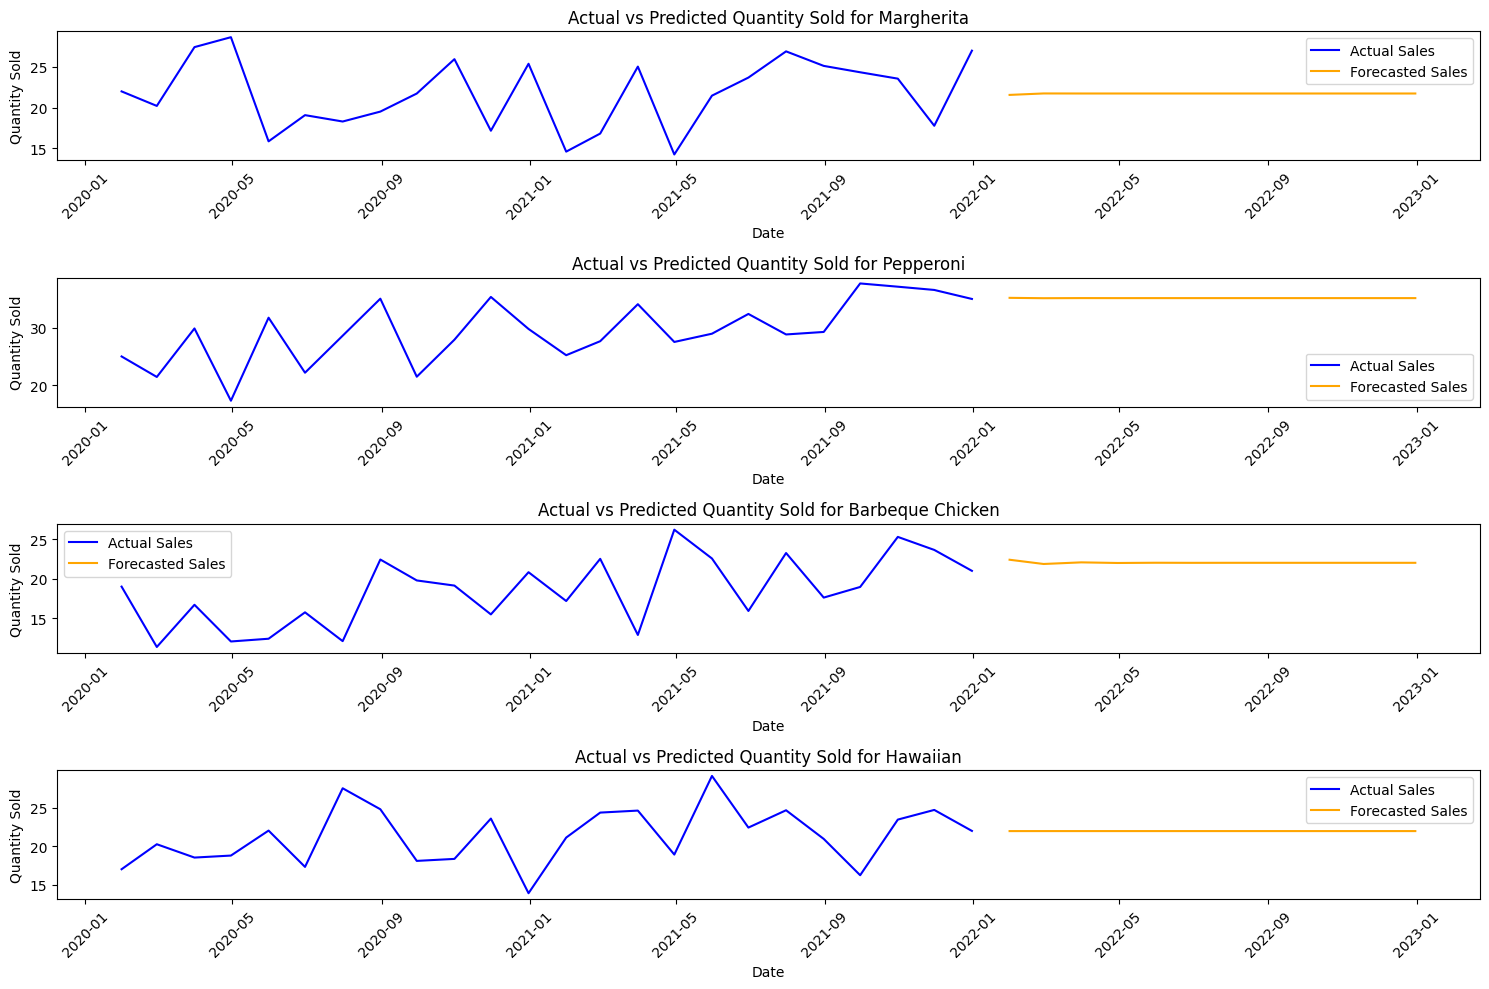

Mean Squared Error for Margherita: 0.00
Mean Squared Error for Pepperoni: 0.00
Mean Squared Error for Barbeque Chicken: 0.00
Mean Squared Error for Hawaiian: 0.00


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Step 1: Load Data
# Simulated sales data for demonstration
data = {
    'date': pd.date_range(start='2020-01-01', periods=24, freq='M'),
    'Margherita': np.random.poisson(lam=20, size=24) + np.linspace(0, 5, 24),
    'Pepperoni': np.random.poisson(lam=25, size=24) + np.linspace(0, 10, 24),
    'Barbeque Chicken': np.random.poisson(lam=15, size=24) + np.linspace(0, 8, 24),
    'Hawaiian': np.random.poisson(lam=18, size=24) + np.linspace(0, 6, 24)
}
sales_data = pd.DataFrame(data)

# Step 2: Preprocess Data
sales_data.set_index('date', inplace=True)

# Step 3: Fit ARIMA Model for Each Pizza Type
pizza_types = sales_data.columns
forecast_results = {}

for pizza in pizza_types:
    # Fit the ARIMA model (p, d, q) parameters
    model = ARIMA(sales_data[pizza], order=(1, 1, 1))  # Adjust parameters as needed
    model_fit = model.fit()

    # Step 4: Make Predictions
    forecast_steps = 12
    forecast = model_fit.forecast(steps=forecast_steps)

    # Combine actual and forecasted values for visualization
    forecast_index = pd.date_range(start=sales_data.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
    forecast_series = pd.Series(forecast, index=forecast_index)

    # Store the forecast results
    forecast_results[pizza] = (sales_data[pizza], forecast_series)

# Step 5: Visualize Actual vs. Predicted Sales for Each Pizza Type
plt.figure(figsize=(15, 10))

for i, pizza in enumerate(pizza_types, 1):
    plt.subplot(len(pizza_types), 1, i)
    plt.plot(forecast_results[pizza][0].index, forecast_results[pizza][0], label='Actual Sales', color='blue')
    plt.plot(forecast_results[pizza][1].index, forecast_results[pizza][1], label='Forecasted Sales', color='orange')
    plt.title(f'Actual vs Predicted Quantity Sold for {pizza}')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Optional: Calculate and print MSE for each pizza type
for pizza in pizza_types:
    mse = mean_squared_error(sales_data[pizza], forecast_results[pizza][0].values)
    print(f'Mean Squared Error for {pizza}: {mse:.2f}')

<ipython-input-34-9d3b112edc23>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.date_range(start='2020-01-01', periods=24, freq='M'),
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Li

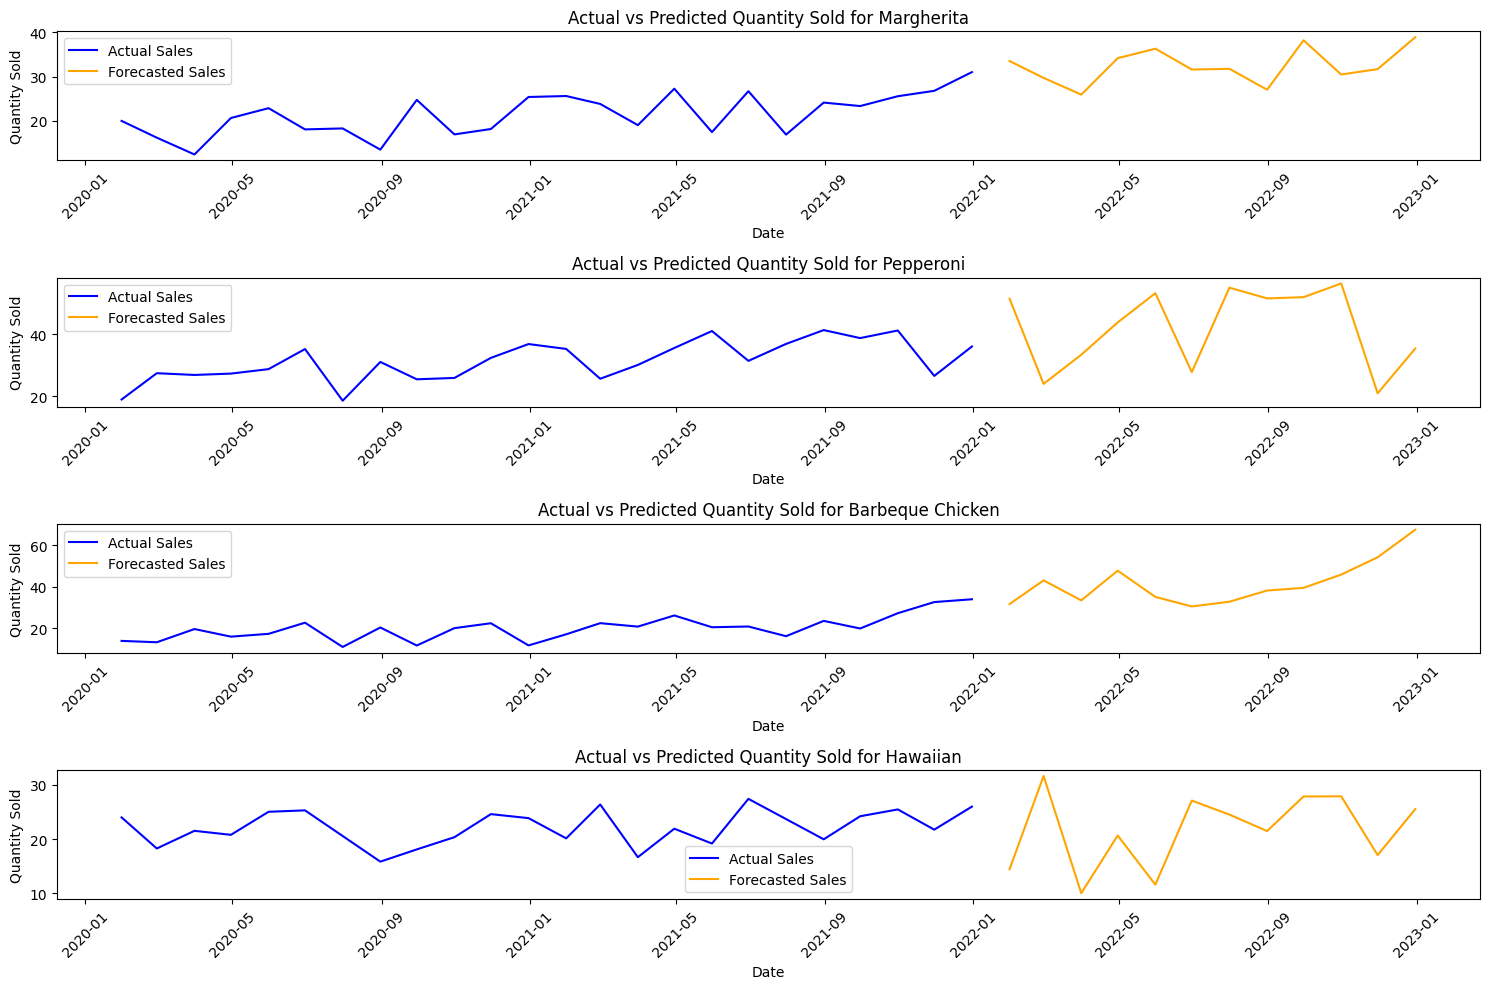

Mean Squared Error for Margherita: 0.00
Mean Squared Error for Pepperoni: 0.00
Mean Squared Error for Barbeque Chicken: 0.00
Mean Squared Error for Hawaiian: 0.00


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Step 1: Load Data
# Simulated sales data for demonstration
data = {
    'date': pd.date_range(start='2020-01-01', periods=24, freq='M'),
    'Margherita': np.random.poisson(lam=20, size=24) + np.linspace(0, 5, 24),
    'Pepperoni': np.random.poisson(lam=25, size=24) + np.linspace(0, 10, 24),
    'Barbeque Chicken': np.random.poisson(lam=15, size=24) + np.linspace(0, 8, 24),
    'Hawaiian': np.random.poisson(lam=18, size=24) + np.linspace(0, 6, 24)
}
sales_data = pd.DataFrame(data)

# Step 2: Preprocess Data
sales_data.set_index('date', inplace=True)

# Step 3: Fit SARIMAX Model for Each Pizza Type
pizza_types = sales_data.columns
forecast_results = {}

for pizza in pizza_types:
    # Fit the SARIMAX model (p, d, q) x (P, D, Q, s) parameters
    model = SARIMAX(sales_data[pizza], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust parameters as needed
    model_fit = model.fit(disp=False)

    # Step 4: Make Predictions
    forecast_steps = 12
    forecast = model_fit.forecast(steps=forecast_steps)

    # Combine actual and forecasted values for visualization
    forecast_index = pd.date_range(start=sales_data.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
    forecast_series = pd.Series(forecast, index=forecast_index)

    # Store the forecast results
    forecast_results[pizza] = (sales_data[pizza], forecast_series)

# Step 5: Visualize Actual vs. Predicted Sales for Each Pizza Type
plt.figure(figsize=(15, 10))

for i, pizza in enumerate(pizza_types, 1):
    plt.subplot(len(pizza_types), 1, i)
    plt.plot(forecast_results[pizza][0].index, forecast_results[pizza][0], label='Actual Sales', color='blue')
    plt.plot(forecast_results[pizza][1].index, forecast_results[pizza][1], label='Forecasted Sales', color='orange')
    plt.title(f'Actual vs Predicted Quantity Sold for {pizza}')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Optional: Calculate and print MSE for each pizza type
for pizza in pizza_types:
    mse = mean_squared_error(sales_data[pizza], forecast_results[pizza][0].values)
    print(f'Mean Squared Error for {pizza}: {mse:.2f}')

<ipython-input-36-c38255a7c007>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.date_range(start='2020-01-01', periods=24, freq='M'),
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplxdjydqu/1vbfvh0t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplxdjydqu/jllte2xv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51159', 'data', 'file=/tmp/tmplxdjydqu/1vbfvh0t.json', 'init=/tmp/tmplxdjydqu/jllte2xv.json',

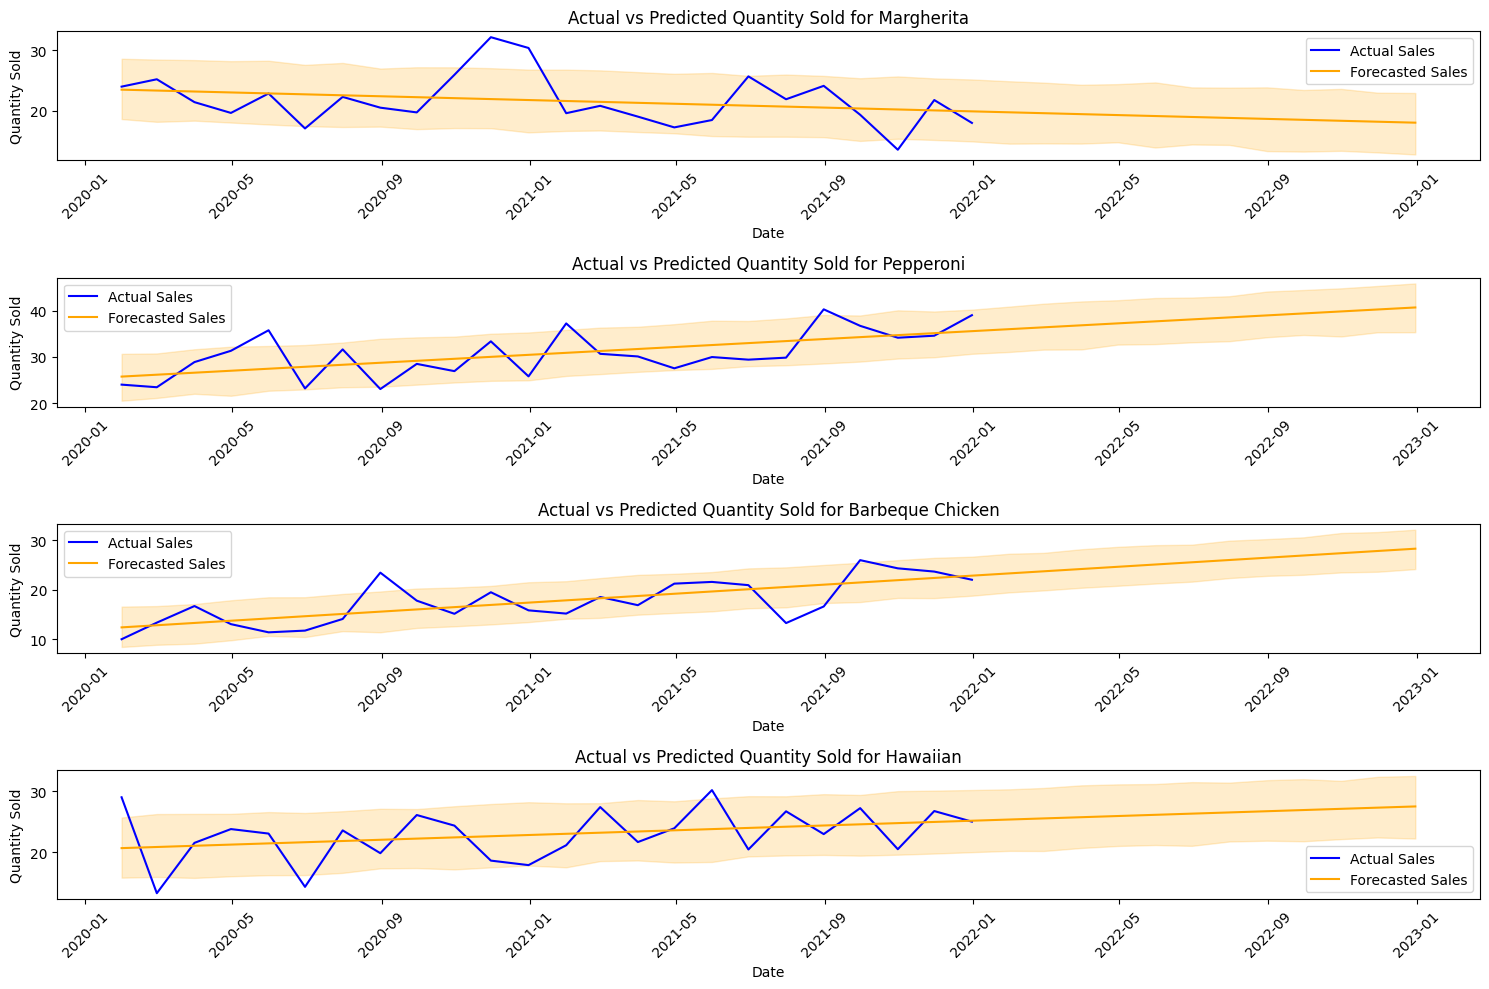

Mean Squared Error for Margherita: 15.62
Mean Squared Error for Pepperoni: 15.21
Mean Squared Error for Barbeque Chicken: 9.63
Mean Squared Error for Hawaiian: 15.49


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# Step 1: Load Data
# Simulated sales data for demonstration
data = {
    'date': pd.date_range(start='2020-01-01', periods=24, freq='M'),
    'Margherita': np.random.poisson(lam=20, size=24) + np.linspace(0, 5, 24),
    'Pepperoni': np.random.poisson(lam=25, size=24) + np.linspace(0, 10, 24),
    'Barbeque Chicken': np.random.poisson(lam=15, size=24) + np.linspace(0, 8, 24),
    'Hawaiian': np.random.poisson(lam=18, size=24) + np.linspace(0, 6, 24)
}
sales_data = pd.DataFrame(data)

# Step 2: Preprocess Data
sales_data.set_index('date', inplace=True)

# Step 3: Fit Prophet Model for Each Pizza Type
pizza_types = sales_data.columns
forecast_results = {}

for pizza in pizza_types:
    # Prepare data for Prophet
    df = sales_data[[pizza]].reset_index()
    df.columns = ['ds', 'y']  # Rename columns for Prophet

    # Fit the Prophet model
    model = Prophet()
    model.fit(df)

    # Step 4: Make Predictions
    future = model.make_future_dataframe(periods=12, freq='M')  # Forecast for the next 12 months
    forecast = model.predict(future)

    # Store the forecast results
    forecast_results[pizza] = (df, forecast)

# Step 5: Visualize Actual vs. Predicted Sales for Each Pizza Type
plt.figure(figsize=(15, 10))

for i, pizza in enumerate(pizza_types, 1):
    plt.subplot(len(pizza_types), 1, i)
    plt.plot(forecast_results[pizza][0]['ds'], forecast_results[pizza][0]['y'], label='Actual Sales', color='blue')
    plt.plot(forecast_results[pizza][1]['ds'], forecast_results[pizza][1]['yhat'], label='Forecasted Sales', color='orange')
    plt.fill_between(forecast_results[pizza][1]['ds'],
                     forecast_results[pizza][1]['yhat_lower'],
                     forecast_results[pizza][1]['yhat_upper'],
                     color='orange', alpha=0.2)
    plt.title(f'Actual vs Predicted Quantity Sold for {pizza}')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Optional: Calculate and print MSE for each pizza type
for pizza in pizza_types:
    mse = mean_squared_error(forecast_results[pizza][0]['y'], forecast_results[pizza][1]['yhat'][:len(forecast_results[pizza][0])])
    print(f'Mean Squared Error for {pizza}: {mse:.2f}')

<ipython-input-39-1e020e8737c0>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.date_range(start='2020-01-01', periods=24, freq='M'),
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-39-1e020e8737c0>:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=sales_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-39-1e020e8737c0>:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(st

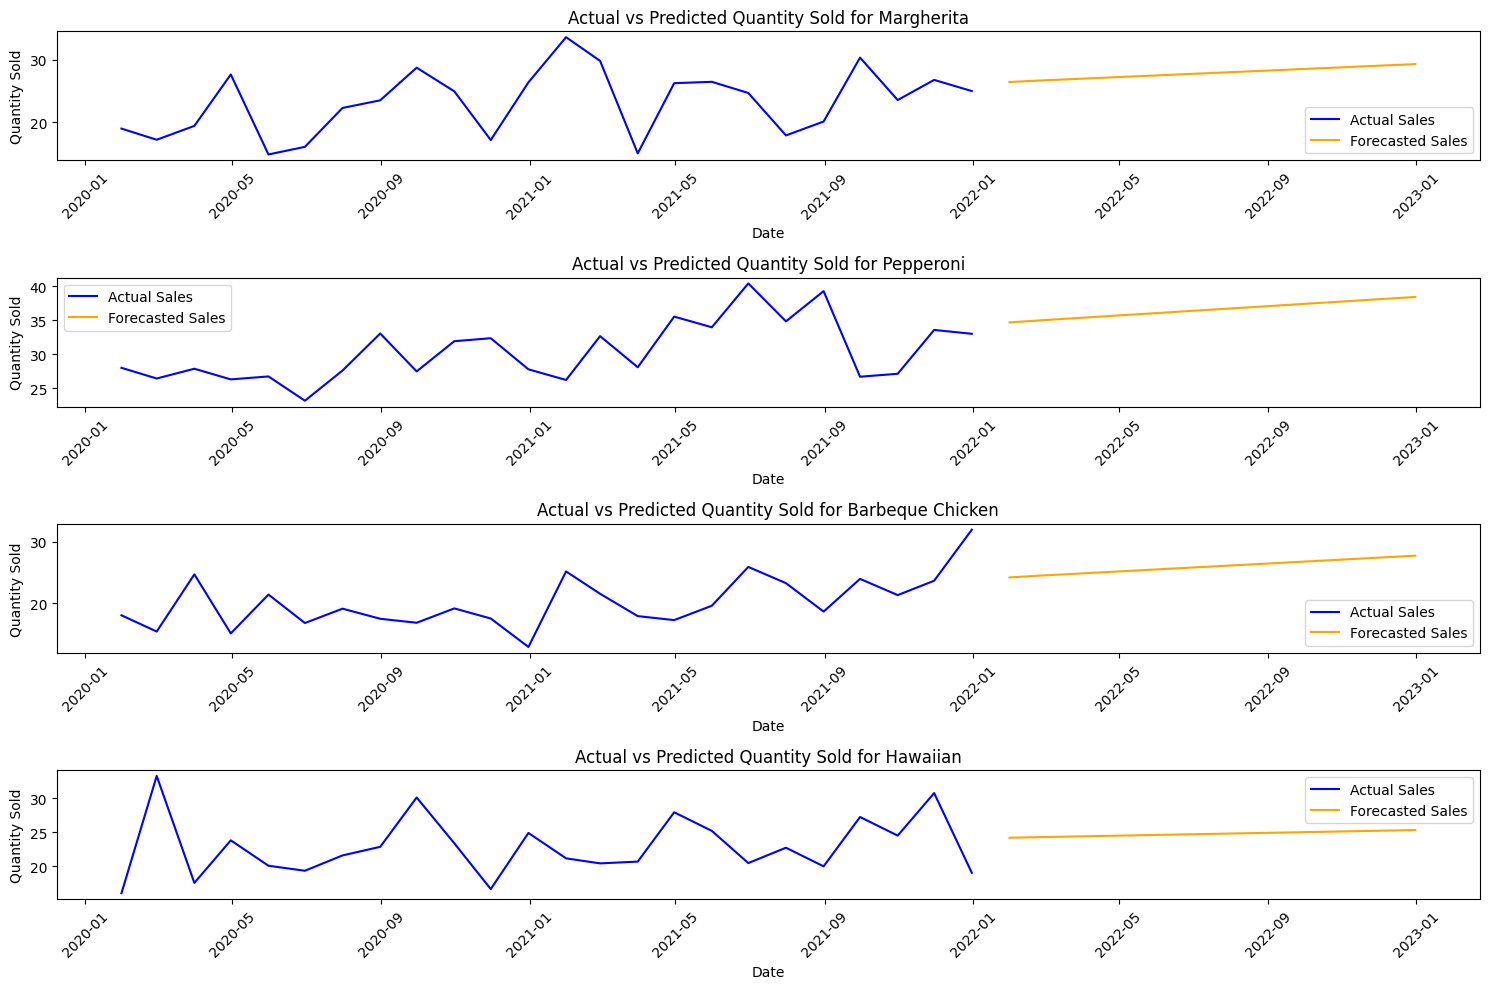

Mean Squared Error for Margherita: 24.49
Mean Squared Error for Pepperoni: 72.88
Mean Squared Error for Barbeque Chicken: 22.34
Mean Squared Error for Hawaiian: 18.67


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load Data
# Simulated sales data for demonstration
data = {
    'date': pd.date_range(start='2020-01-01', periods=24, freq='M'),
    'Margherita': np.random.poisson(lam=20, size=24) + np.linspace(0, 5, 24),
    'Pepperoni': np.random.poisson(lam=25, size=24) + np.linspace(0, 10, 24),
    'Barbeque Chicken': np.random.poisson(lam=15, size=24) + np.linspace(0, 8, 24),
    'Hawaiian': np.random.poisson(lam=18, size=24) + np.linspace(0, 6, 24)
}
sales_data = pd.DataFrame(data)

# Step 2: Preprocess Data
sales_data.set_index('date', inplace=True)

# Step 3: Fit Regression Model for Each Pizza Type
pizza_types = sales_data.columns
forecast_results = {}

for pizza in pizza_types:
    # Prepare data for regression
    sales_data['month'] = np.arange(len(sales_data))  # Create a month index for regression
    X = sales_data[['month']]  # Features
    y = sales_data[pizza]  # Target variable

    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X, y)

    # Step 4: Make Predictions
    future_months = np.arange(len(sales_data), len(sales_data) + 12).reshape(-1, 1)  # Next 12 months
    forecast = model.predict(future_months)

    # Store the forecast results
    forecast_index = pd.date_range(start=sales_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
    forecast_series = pd.Series(forecast, index=forecast_index)
    forecast_results[pizza] = (sales_data[pizza], forecast_series)

# Step 5: Visualize Actual vs. Predicted Sales for Each Pizza Type
plt.figure(figsize=(15, 10))

for i, pizza in enumerate(pizza_types, 1):
    plt.subplot(len(pizza_types), 1, i)
    plt.plot(forecast_results[pizza][0].index, forecast_results[pizza][0], label='Actual Sales', color='blue')
    plt.plot(forecast_results[pizza][1].index, forecast_results[pizza][1], label='Forecasted Sales', color='orange')
    plt.title(f'Actual vs Predicted Quantity Sold for {pizza}')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Optional: Calculate and print MSE for each pizza type
for pizza in pizza_types:
    # Predict the training data (the first 24 months)
    X_train = sales_data[['month']]
    y_train_pred = model.predict(X_train)

    # Calculate MSE for the training data
    mse = mean_squared_error(sales_data[pizza].values, y_train_pred)
    print(f'Mean Squared Error for {pizza}: {mse:.2f}')

<ipython-input-41-30e8001e59c0>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.date_range(start='2020-01-01', periods=24, freq='M'),
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2345
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1048
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0566
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0534
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0544
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0515
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0427
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0567
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0486
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0440
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0537
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0433
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0552
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0466
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0515
Epoc

<ipython-input-41-30e8001e59c0>:69: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=sales_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2204
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1137
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0649
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0547
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0555
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0543
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0511
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0497
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0475
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0489
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0486
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0437
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0616
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0665
Epoch 16/100
20/

<ipython-input-41-30e8001e59c0>:69: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=sales_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2957
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1230
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0592
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0492
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0501
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0543
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0542
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0587
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0572
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0464
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0607
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0492
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0409
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0558
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0477
Epoch 16/100
20/

<ipython-input-41-30e8001e59c0>:69: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=sales_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2519
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0898
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0608
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0574
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0492
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0530
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0477
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0511
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0529
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0559
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0466
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0641
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0422
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0436
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0478
Epoch 16/100
20/

<ipython-input-41-30e8001e59c0>:69: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=sales_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')


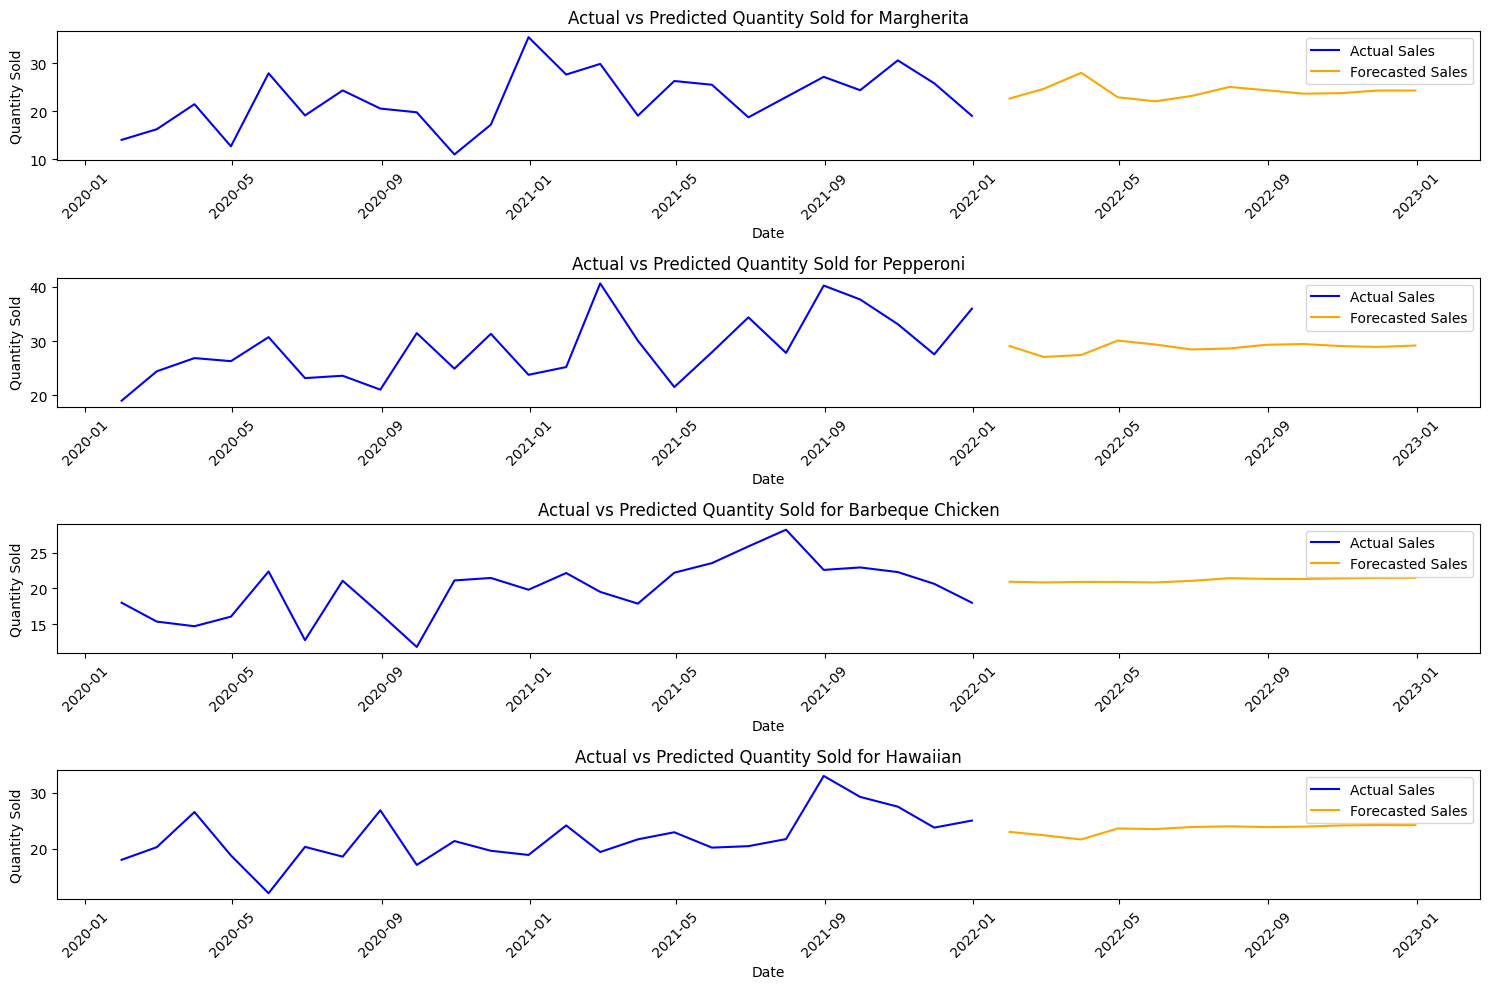

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Step 1: Load Data
# Simulated sales data for demonstration
data = {
    'date': pd.date_range(start='2020-01-01', periods=24, freq='M'),
    'Margherita': np.random.poisson(lam=20, size=24) + np.linspace(0, 5, 24),
    'Pepperoni': np.random.poisson(lam=25, size=24) + np.linspace(0, 10, 24),
    'Barbeque Chicken': np.random.poisson(lam=15, size=24) + np.linspace(0, 8, 24),
    'Hawaiian': np.random.poisson(lam=18, size=24) + np.linspace(0, 6, 24)
}
sales_data = pd.DataFrame(data)

# Step 2: Preprocess Data
sales_data.set_index('date', inplace=True)

# Step 3: Prepare Data for LSTM
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(sales_data)

# Function to create dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), :]
        X.append(a)
        y.append(data[i + time_step, :])
    return np.array(X), np.array(y)

# Prepare data for each pizza type
time_step = 3  # Number of previous time steps to consider
forecast_results = {}

for pizza in sales_data.columns:
    X, y = create_dataset(scaled_data, time_step)

    # Reshape input to be [samples, time steps, features]
    X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

    # Step 4: Build and Train the LSTM Model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(len(sales_data.columns)))  # Output layer for each pizza type

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=100, batch_size=1, verbose=1)

    # Step 5: Make Predictions
    # Prepare input for prediction
    last_data = scaled_data[-time_step:].reshape(1, time_step, len(sales_data.columns))
    forecast = []

    for _ in range(12):  # Forecast for the next 12 months
        prediction = model.predict(last_data)
        forecast.append(prediction[0])
        last_data = np.append(last_data[:, 1:, :], prediction.reshape(1, 1, len(sales_data.columns)), axis=1)

    # Store the forecast results
    forecast_series = scaler.inverse_transform(forecast)  # Inverse transform to original scale
    forecast_index = pd.date_range(start=sales_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
    forecast_results[pizza] = (sales_data[pizza], pd.Series(forecast_series[:, sales_data.columns.get_loc(pizza)], index=forecast_index))

# Step 6: Visualize Actual vs. Predicted Sales for Each Pizza Type
plt.figure(figsize=(15, 10))

for i, pizza in enumerate(sales_data.columns, 1):
    plt.subplot(len(sales_data.columns), 1, i)
    plt.plot(forecast_results[pizza][0].index, forecast_results[pizza][0], label='Actual Sales', color='blue')
    plt.plot(forecast_results[pizza][1].index, forecast_results[pizza][1], label='Forecasted Sales', color='orange')
    plt.title(f'Actual vs Predicted Quantity Sold for {pizza}')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-54-6a496282a9a0>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.date_range(start='2020-01-01', periods=24, freq='M'),
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
<ipython-input-54-6a496282a9a0>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=sales_data.index

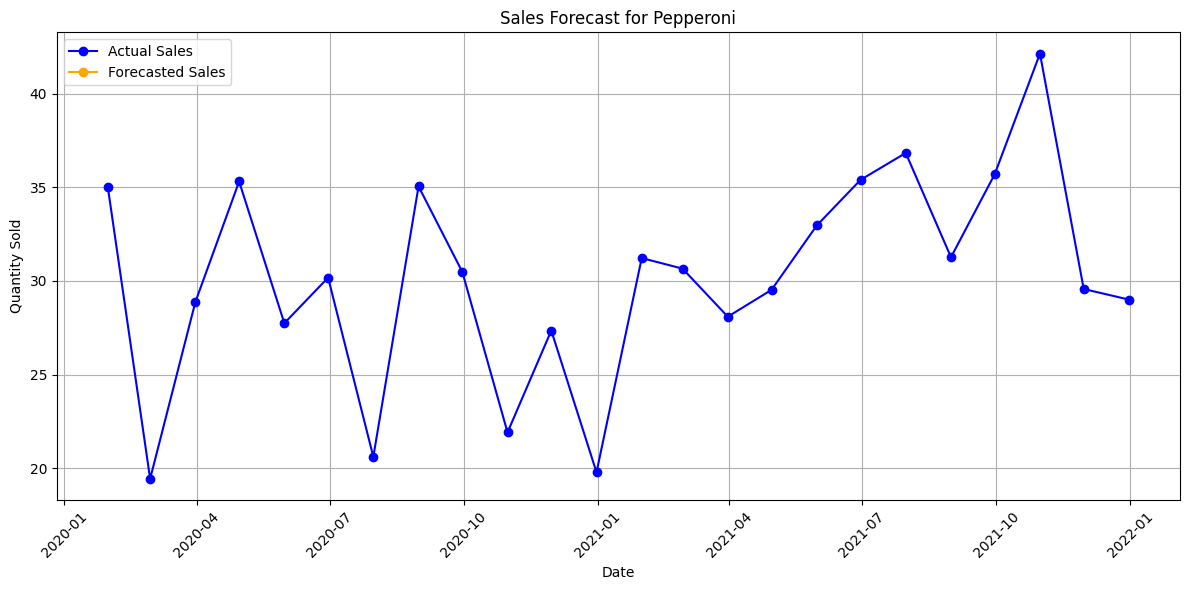

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Simulated sales data for demonstration
data = {
    'date': pd.date_range(start='2020-01-01', periods=24, freq='M'),
    'Margherita': np.random.poisson(lam=20, size=24) + np.linspace(0, 5, 24),
    'Pepperoni': np.random.poisson(lam=25, size=24) + np.linspace(0, 10, 24),
    'Barbeque Chicken': np.random.poisson(lam=15, size=24) + np.linspace(0, 8, 24),
    'Hawaiian': np.random.poisson(lam=18, size=24) + np.linspace(0, 6, 24)
}
sales_data = pd.DataFrame(data)
sales_data.set_index('date', inplace=True)

# Select the pizza type for prediction
pizza_type = 'Pepperoni'

# Fit the ARIMA model
model = ARIMA(sales_data[pizza_type], order=(1, 1, 1))  # Adjust the order as needed
model_fit = model.fit()

# Make predictions for the next 12 months
forecast = model_fit.forecast(steps=12)

# Create a date range for the forecasted values
forecast_index = pd.date_range(start=sales_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=[pizza_type])

# Combine actual and forecasted data for plotting
combined_df = pd.concat([sales_data[pizza_type], forecast_df])

# Plot the actual sales and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(sales_data[pizza_type], label='Actual Sales', color='blue', marker='o')
plt.plot(forecast_df, label='Forecasted Sales', color='orange', marker='o')
plt.title(f'Sales Forecast for {pizza_type}')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()